# Recommended Resources
For this tutorial I recommend following along with the following:
* Week 3 of Andrew NG Machine learning course, https://www.coursera.org/learn/machine-learning
* He is an incredible teacher and will help give the intuitions necessary to excel and feel confident going forward!

# Table of Contents
* [Motivation](#motivation)
* [Overview](#overview)
* [Cost Function](#cost-function)
* [Simplified Cost Function](#simplified-cost-function)
* [Gradient Descent](#gradient-descent)
* [Advanced Optimizations](#advanced-optimizations)
* [Multiclass Classification](#multiclass-classification)
* [Regularization](#regularization)
* [Regularized Cost Function](#cost-function-regularization)
* [Regularized Linear Regression](#linear-regression-reg)
* [Regularized Logistic Regression](#logistic-regression-reg)
* [Problem set - Logisitic Regression under the hood](#problem-set-1)
* [Logistic Regression with Scikit Learn](#scikit-learn)


# Key Terms
Here is a list of key terms that you can `cmd+f` to learn a bit more about. 
* Classification 
* Logistic Regression
* Sigmoid Function
* Decision Boundary
* Non-linear Decision Boundary
* cost function
* convex
* non-convex
* maximum likelihood method 
* gradient descent
* regularization
* underfitting
* high bias
* overfitting
* high variance

# Motivation <a class="anchor" id="motivation"></a>
Logistic Regression is another form of supervised learning, and is used to predict a class based output (discrete valued). 

Let's start with an example. Lets say you are a doctor, and you are told that a patient has a tumor of a certain size. You want to be able to determine whether the cancer is malignant or benign based on the size of the tumor! 

This could look something like the figure below: 

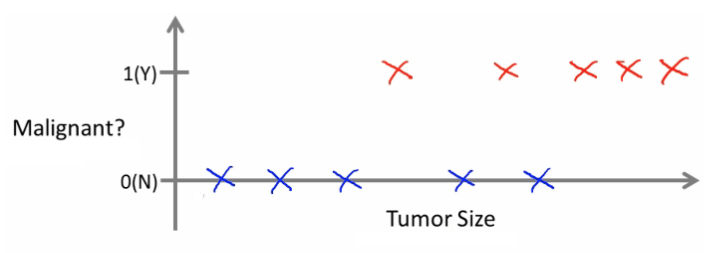

Here we have a historical data set made up of 10 different tumors. Each tumor has a size and a classification: was it **malignant (1 - yes)**, or **not malignant (0 - no)**. By looking at the data, can we estimate a prognosis based on tumor size? This is an example of a **classification problem**. 

### Classification Problem 
A classification problem is one where we true and classify data into one of two (or potentially more than two) discrete classes. There is no in between- either it is malignant or not. Again, there can be a discrete number of possible values for the output. In our example, for instance, instaed of just having two values (malignant vs not malignant), we could have:
* 0 - benign
* 1 - type 1 tumor
* 2 - type 2 tumor
* 3 - type 3 tumor

Now, in the example above we only were using 1 input feature. However, in other problems we may have multiple attributes, such as **age** and tumor size.

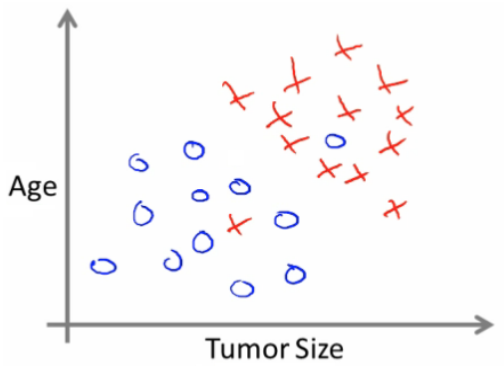

Based on the data above, you can try and define separate classes by several methods:
* Drawing a straight line between the two groups
* Using a more complex function to define the two groups 

Once this is done, once you have a new example of an individual with a specific tumor size and age, you can place them into one of your pre defined classes. 

Keep in mind, you might have many features to consider:
* clump thickness
* Uniformity of cell size
* Uniformity of cell shape

# Overview <a class="anchor" id="overview"></a>
In logistic regression, the Y value that we are trying to predict is a **discrete** value. Our goal is to develop a logistic regression algorithm to determine what class a new input should fall into. 

### Examples
What are some examples of classification problems?
* Email classifcation: is the email spam or not spam?
* Online Transaction: Is the transaction fraudulent or not fraudulent?
* Tumor classifcation: Malignant or benign?

In these situation, our output variable (in statistical terms the **response**) is $Y$, and it takes a value of either 0 or 1. Here 0 is defined as the **negative class** (absence of something) and 1 is defined as the **positive class** (presence of something). 

### Why not use Linear Regression?
A good question to ask as we delve into this new algorithm is "Why should we not just use linear regression?"

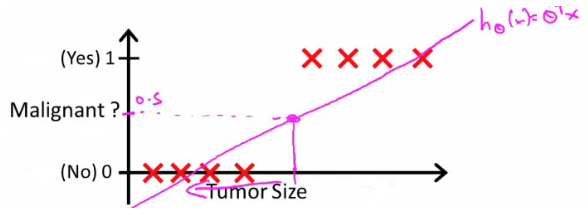

Seen above, we try to implement logistic regression to classify tumors of a certain size (threshold the classifier output - anything over a certain value is malignant). Above, it actually seems to be working. 

However, what if we had a single Yes with a very small tumor? This would lead to classify all of the existing Yes's as No's! Linear regression can also give values of Y greater than 1 or less than 0. 

Logistic Regression on the other hand generates a value always between 0 and 1! Remember, logistic regression is a classifcation algorithm!

## Hypothesis 
We are going to start by asking the question, what function should be used to represent our hypothesis in classification? 
Remember, we want our classifier to represent output values between 0 and 1!

Recall, for linear regression our hypothesis was: 
### $$h_\theta(x) = (\theta^Tx)$$

For classication, we define our hypothesis representation as:
### $$h_\theta(x) = g((\theta^Tx))$$

Where we define $g(z)$ as:
### $$g(z) = \frac{1}{1+e^{-z}}$$

#### Note: This is the Sigmoid Function!

If we combine these two equation, we can write out our hypothesis as: 
### $$h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$$

What does the sigmoid function look like? Well it crosses the origin at 0.5. and then flattens out (asymptotes at 0 and 1).

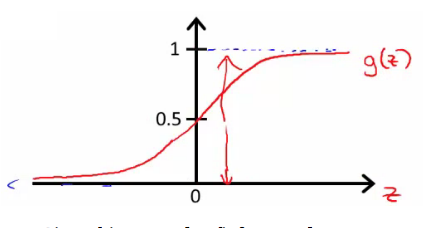

This can also be seen in code, below:

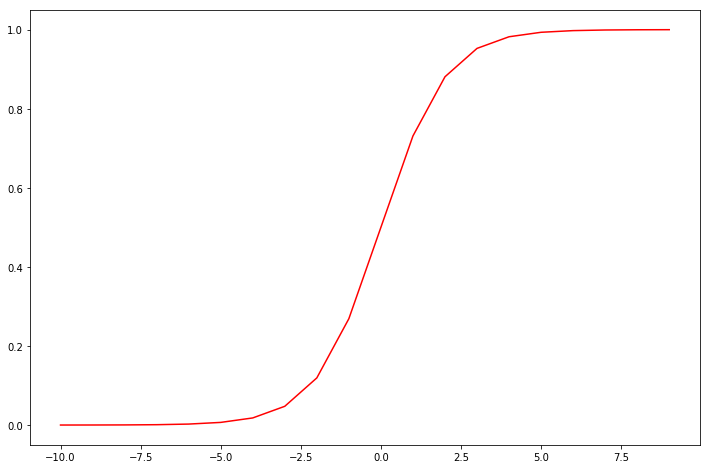

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

### Intepreting our Hypothesis Output 
When our hypothesis outputs a number, we treat that value as the estimated probability that y=1 on input x.

As an example:
* X is a feature vector with $x_0$ = 1 and $x_1$ = tumourSize
* $h_\theta(x) = 0.7$
* This tells a patient that they have a 70% chance of a tumor being malignant
* This can be written using the following notation:
###$$h_\theta(x) = P(y=1|x;\theta)$$
* In english this represents the probability that y = 1, given x, parameterized by $\theta$

### Decision Boundary 
A decision boundary gives us a better sense of what the hypothesis is computing, and what the hypothesis function looks like. One way of using the sigmoid function is to say:
* When the probability of y being 1 is greater than 0.5 then we can predict y = 1 
* Else, we predict y = 0 

How do we know when the probability of $h_\theta(x)$ is greater than 0.5 (our threshold)? Lets look at the sigmoid function!

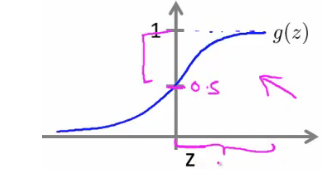

$g(z)$ is greater than or equal to 0.5 when z is greater than or equal to 0. In other words, if z is *positive*, we will predict 1. 

Remember, $z = (\theta^Tx)$, which means that when: 
### $$\theta^Tx \geq 0$$
then:
### $$h_\theta(x) \geq 0.5$$

This can be summed up as:
###  <center>Our hypothesis predicts y = 1 when $\theta^Tx \geq 0$</center>
The correlary of this is that when $\theta^Tx \leq 0$, then the hypothesis predicts y = 0

Lets walk through an example of a decision boundary implementation below.

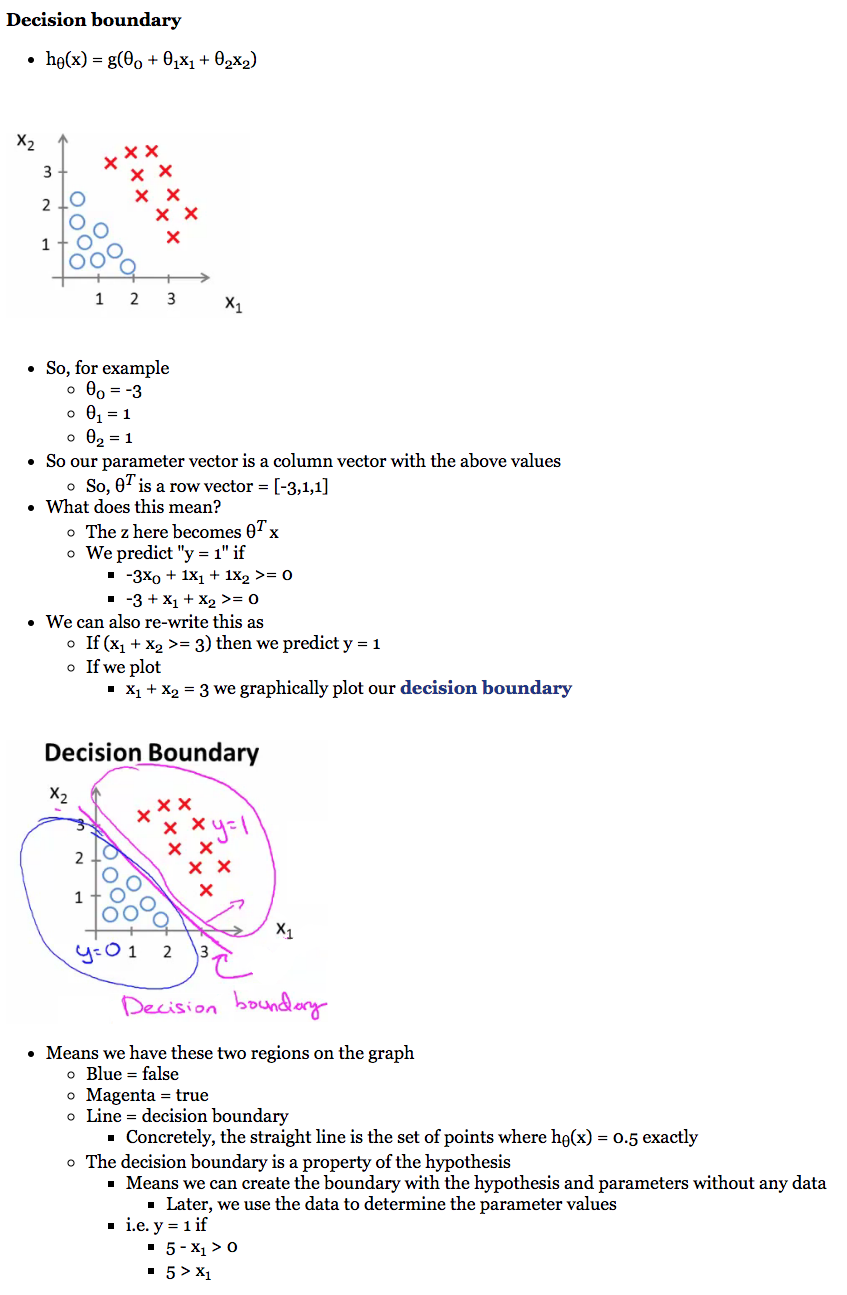

### Intuitions about the example above
Keep in mind that in the example decision boundary above, the pink line is the **prediction threshold**. In other words, it is the set of points where $h_\theta(x)$ = 0.5 exactly. That means that say we have an $x_1$ input of 2. Our prediction looks like its about $x_2$ = 1, which is where our probability is 0.5. If our $x_2$ value is higher than 1, we predict yes, else we predict no. 

### Non-Linear Decision Boundary
Sometimes, our data set can't always be classified with a simple linear line. In that case, we may need to work with a non linear decision boundary, seen below. 

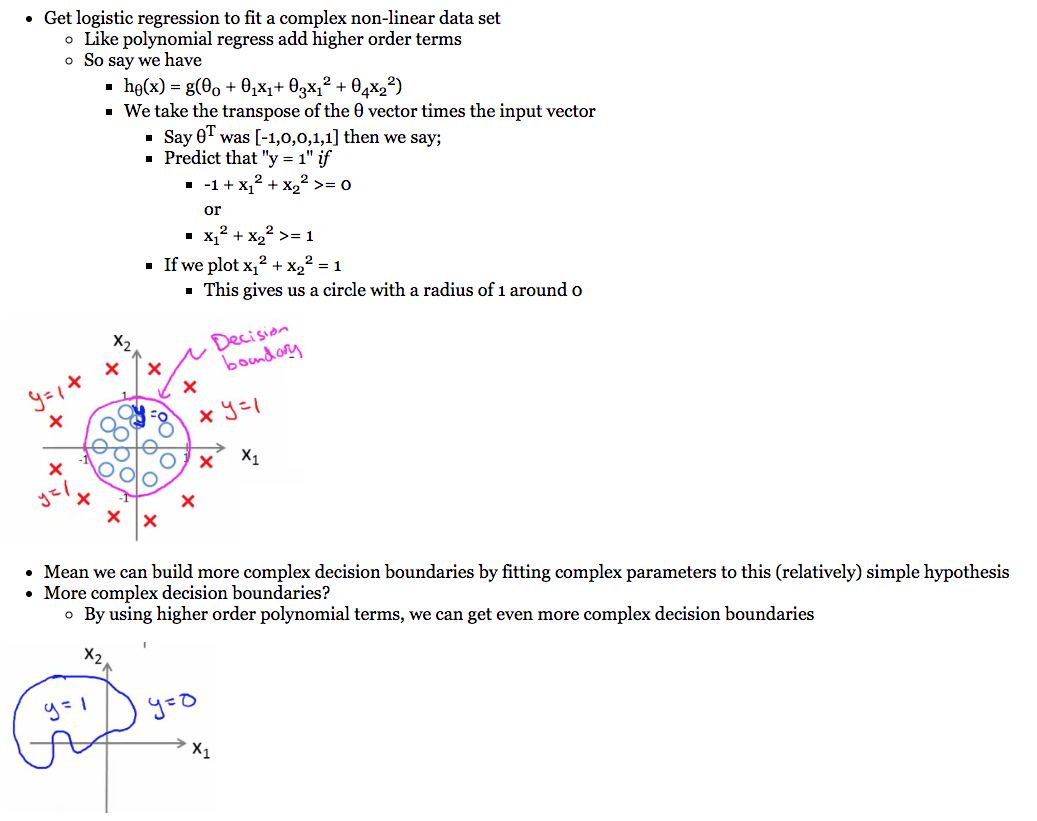

# Cost function for logistic regression <a class="anchor" id="cost-function"></a>
We have spoken of cost functions at length in the linear regression tutorials, but to quickly recap, a cost function can be thought of as how much error a model (hypothesis) incurs when training on a particular data set. The more error there is between a data set of observed responses and a models prediction, the higher the cost. 

Okay, now lets look at the cost function for logistic regression in a bit more detail:

### Here is our starting point: 
* We have a training set of $m$ training examples ${(x^1,y^1),(x^2,y^2),...,(x^m,y^m)}$
* Each training example has an input vector, $x$, of length (n+1), where n is the number of features
* and an output, y, that is either 0 or 1, ie. $y \in{0,1}$
* And we have our hypothesis:
### $$h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$$
* And this hypothesis is based on the parameters $\theta$ 

### Given the training set, how do we chose/fit $\theta$?
Lets think back to linear regression. We used the following function (cost function) to determine $\theta$:
### $$J(\theta) = \frac 1{2m}\sum_{i=1}^m(h_\theta(x^i) - y^i)^2$$
Now, instead of writing the squared error term, lets replace it with:
### $$\frac 12(h_\theta(x^i) - y^i)^2 = Cost(h_\theta(x^i)-y^i)$$
This still evaluates to the same cost for an an individual example using the same measure we used in linear regression. At this point we can simply redefine J as:
### $$J(\theta)= \frac 1{m}\sum_{i=1}^mCost(h_\theta(x^i)-y^i)$$
And, if we simplify one more time we can get rid of the superscripts:
### $$J(\theta)= \frac 1{m}\sum_{i=1}^mCost(h_\theta(x)-y)$$

So, what does this actually mean? This value of $J(\theta)$ is the cost that you want to algorithm to pay if the outcome is $h_\theta(x)$ and the actual outcome (real world observation) is $y$. In linear regression this cost is the RSS, or sum of squared errors-in other words what we want the algorithm to pay. 

We don't want to use the same cost function (RSS) for logistic regression, because it ends up being non-convex for parameter optimization.

What does it mean to say **non-convex**? 
* We have some function, $J(\theta)$, that we use to determine our parameters. 
* Our hypothesis for logistic regression has a non-linearity (it is a sigmoid function)
    * This is a complicated non-linear function
* If you take $h_\theta(x)$ and plug it into the $Cost()$ function above, and then plug the $Cost()$ function into $J(\theta)$, when you finally plot $J(\theta)$ you will find many local optimum
    * This means that it is a non-convex function
* Why makes this a problem?
    * many local minima mean that gradient descent may not find the global optimum - it may get stuck at a local minimum
* Ideally, we want a convex function so that when we run gradient descent we know that we find the global minimum, and subsequently the best set of parameters possible for our model when classifying the training data

### A convex logistic regression cost function
In order to get around this we need to find a different, convex Cost() function so we can apply gradient descent. Below is our **logistic regression cost function**:

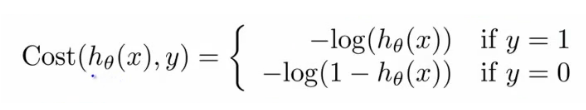

This cost function represents the penalty that the algorithm will pay for each prediction! Remember, before in linear regression is was just the RSS (the residual sum of squares). Think back to the plot from the machine learning logistic regression lecture that had the grey bars-we were just squaring those and summing them all to determine the error. Now our way of penalizing an algorithm is a bit different (based on a logarithmic function).

When our real world observation is y = 1, then our $Cost()$ evaluates as:
### $$-log(h_\theta(x))$$

And if our real world observation is y = 0, then our $Cost()$ evaluates as:
### $$-log(1 - h_\theta(x))$$

### Intuition:
Remember, $h_\theta(x)$ is still what is being used to make our predictions. It can be a bit confusing to conceptualize the cost function in the case of logistic regression, considering how straight forward it was in linear regression. All we had to do in that case was find the error (difference) between the prediction and real world observation, square it, and then sum all of the squared errors from the training set. The equation looked like: **$\frac 12(h_\theta(x^i) - y^i)^2 $**. That was our **total cost**, or the penalty that the algorithm paid for a prediction. The lower the cost, the better we said our algorithm was performing. 

In the case of logistic regression, it is different. We are no longer finding the exact error between the real world value (say it is y = 1) and the prediction (say it was $h_\theta(x) = .897$). Before the cost for that example would have been $\frac 12(1-.897)^2$. That is no longer the case. We have a different metric to determine the amount we "pay" for each example. In other words, before the thought process was: 
* if y = 1, then we subtract our prediction value from it, and square the result
* That value is the cost we pay for one training example

However, now that thinking has changed. In the case of logistic regression, the thought process is:
* if y = 1, then we are going calculate our prediction, $h_\theta(x)$, and then take the negative log of it
* in other words, we will find $-log(prediction)$
* that output value will be the cost that we pay based on our prediction for a specific training example. 

Okay with the inuition laid out, lets plot the new $Cost()$ function when y (our real world observation is equal to 1):

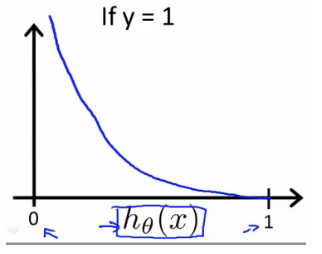

What we are seeing is a plot of **Cost** vs. **$h_\theta(x)$**, when y = 1. In this case, as shown above, our $Cost()$ will be $-log(h_\theta(x))$. It is clear that when our prediction, $h_\theta(x)$, is perfect, i.e. equal to 1, that the cost is equal to 0! However, as we become "more" wrong, and our prediction differs more and more from 1, our cost grows. 

This cost function has some very interesting properties:
* For instance, if the real world observation y = 1 and $h_\theta(x)$ = 1, then the cost is *exactly* 0. 
* Also, if the real world observation is 1 (y =1), as our prediction gets closer to 0 (in other words a very bad prediction), our cost will start to go to infinity! This captures the intuition that if $h_\theta(x)$ = 0 (aka predict $P(y=1|x;\theta) = 0$), but y = 1, this will **penalize** the learning algorithm with a **massive cost**.

Now, what about if y = 0?

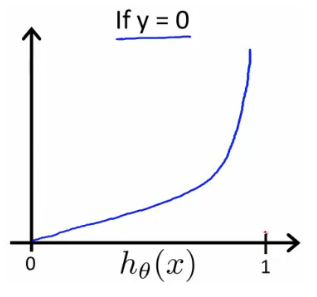

In this case the $Cost()$ is $-log(1 - h_\theta(x))$. You can see from the above plot that that just gave us the inverse function of the $Cost()$ for y = 1. Now, when our prediction is way off, ie $h_\theta(x)$ = 1, the **cost** associated with the prediction blows up towards infinity. 

With these new and improved cost functions (as opposed to RSS from linear regression), $J(\theta)$ is going to be convex and never hit a local minimum! 

# Simplified Cost Function <a class="anchor" id="simplified-cost-function"></a>
Now that we have our cost function defined, we want to try and figure out a simpler way to write it so that gradient descent can be applied!

So, lets pick up where we left off. The **Logistic Regression Cost Function** looks like:
### $$J(\theta)= \frac 1{m}\sum_{i=1}^mCost(h_\theta(x^i)-y^i)$$
where $Cost(h_\theta(x), y)$ is:

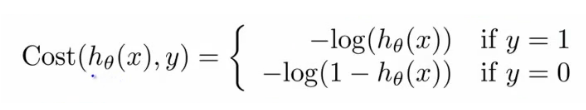

Note: y is always equal to 0 or 1. This cost above represents the cost that we "pay" for a single prediction made from our algorithm. Because this is a binary classification and y is always 0 or 1, we can find a simpler way to write this cost function! At this point our cost function is on two lines/two cases, but we can compress it into one line and make it more efficient! to do this we can write our cost function as:

### $$Cost(h_\theta(x), y) = -ylog(h_\theta(x)) - (1 - y)log(1-h_\theta(x))$$

This equation is a more compact equation of the one above. We know that there are only two possible cases: y = 0, y = 1.

Lets look at the case **y = 1**. Our equation simplifies to:
### $$Cost(h_\theta(x), y) = -1*log(h_\theta(x)) - (1 - 1)log(1-h_\theta(x))$$
### $$Cost(h_\theta(x), y) = -1*log(h_\theta(x)) = -log(h_\theta(x))$$
This is what we had before in the two line equation! Now lets look at when **y = 0**:
### $$Cost(h_\theta(x), y) = -0**log(h_\theta(x)) - (1 - 0)log(1-h_\theta(x))$$
### $$Cost(h_\theta(x), y) = -1*log(1-h_\theta(x)) = -log(1-h_\theta(x))$$ 
Again, we are left with the exact equation for y = 0 from the two line equation above. Rather clever solution!

So, to summarize that all, the cost function for logisitic regression, solving for parameters $\theta$ can be defined as: 
### $$J(\theta) = -\frac{1}{m}\big[\sum_{i=1}^m\big(y^ilog(h_\theta(x^i)) + (1 - y^i)log(1-h_\theta(x^i))\big)\big]$$

The question may arise, *why do we chose this cost function when others exist?* Remember that for linear regression we used the RSS, and there are others that we could chose from. So why chose this one?

Well, this cost function can be derived from the statistics using the principle of **maximum likelihood estimation**. Lets take a second to dig into the background of the maximum likelihood method.

### Background: Maximum Likelihood Method
It seems reasonable that a good estimate of the unknown parameter(s) $\theta$ would be the value of $\theta$ that **maximizes** the probability, errr... should I say **likelihood**, of getting the data we observe (y). That is where the likelihood name comes from. In our example it would look something like this: 
* We have a set of examples, x and y, where y is the observed output
* maximal likelihood estimation begins with the mathematical expression known as a likelihood function of the sample dta
* Loosely speaking, the likelihood of a set of data if the probability of obtaining that particular set of data given the chosen probability model 
* this expression contains the unknown parameters
* those values of the parameters that maximize the sample likelihood are known as the maximum likelihood estimates

### Comparison: Least Squares (Linear Regression) vs Maximum Likelihood (Logistic Regression)
In general, when we analyze an analysis of variance or linear regression, typically we estimate parameters for the model using the principle of **least squares**. The idea behind least squares is that we choose parameter estimates that **minimize the average squared difference between observed and predicted values**. In other words, we maximize the fit of the model to the data by choosing the model that is closest, on average, to the data. Intuitively this should make sense! 

However, in the case of logistic regression, least squares generally cannot be used as an estimation method. The main reasons for this are:
* The cost function will not end up being convex, making gradient descent very difficult to use (will struggle to converge to global minimum
* The MLE is more computationaly efficient 

Because least squares cannot be effectively used, we instead turn to the **method of maximal likelihood**. In
maximum likelihood estimation, we search over all possible sets of parameter values for a specified model to
find the set of values for which the observed sample was most likely. That is, we find the set of parameter
values that, given a model, were most likely to have given us the data that we have in hand. 

By way of analogy, imagine that you are in a jury for a civil trial. Four things are presented to you in the course of the trial: 1) charges that specify the purpose of the trial, 2) prosecution's version of the truth, 3) defendant's version of the truth, and 4) evidence. Your task on the jury is to decide, in the context of the specified charges and given the evidence presented, which of the two versions of the truth most likely occurred. You are asked to choose which version of the truth was most likely to have resulted in the evidence that was observed and presented.

Analogously, in statistical analysis with maximum likelihood, we are given: 1) a specified conceptual,
mathematical, and statistical model, 2) one set of values for the parameters of the model, 3) another set of
values for the parameters of the model, and 4) observed data. We want to find the set of values for the
parameters of the model that are most likely to have resulted in the data that were actually observed. (We do
this by searching over all possible sets of values for the parameters, not just two sets.)

In analysis of variance or linear regression, we measure the fit of the model to the data using the regression sum
of squares. With maximum likelihood, the likelihood measures the fit of the model to the data, Therefore, we
want to choose parameter values that maximize the likelihood.

In analysis of variance or linear regression if we want to compare the fit of two models, we form the ratio of
two mean squares to yield an F-test . With maximum likelihood, we do this by forming the ratio of two
likelihoods to yield a chi-square test. 

Here is a great video to give a bit more intuition of the MLE if you are interested: https://www.youtube.com/watch?v=XepXtl9YKwc

### Back to Cost Function...
Okay so now that we have our cost function, $J(\theta)$, we now want to find the parameters which **minimize** $J(\theta)$. This will be the set of parameters that we use in our model to make predictions on new training examples which is has never seen before. 

So what would that prediction process look like? And where exactly are these parameters values, $\theta$, going to be used again?
* We have an initial training set of many x,y examples
* We take our cost function and apply it to all examples, and then find the set of $\theta$ that minimize the cost
* Once we have those values of $\theta$ we can make predictions on new training examples!
* In other words, say we are given a new examples with a set of features (x)
* We can then take the $\theta$ which we generated, and output our prediction using:
### $$h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$$
* This will return a probability value between 0 and 1, which we use to classify our example and output a y value
* In other words, the result is: $p(y=1 | x; \theta)$. Which in english means: the probability y = 1, given x, parameterized by $\theta$.

# Gradient Descent <a class="anchor" id="gradient-descent"></a>
Okay, lets quickly recap where we are at currently:
* We have our cost function for logistic regression
* We know that by minimizing its value over the whole training set (by changing out parameter values, $\theta$, we can optimize our hypothesis
* But how do we actually find the values of $\theta$ that minimize the cost function?...

That is where gradient descent comes in! Just as before, we will repeatedly update each parameter using learning rate:

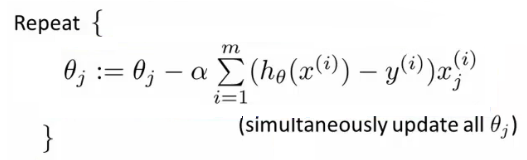

Notice, that this equation looks the same as our gradient descent for linear regression! But think about it, something has changed...**Our hypothesis!!**

Remember, we previously spoke about monitoring our gradient descent to ensure that it's working- we can do the same thing with logistic regression!

Some key points to keep in mind:
* just as with linear regression gradient descent, we still need to update all values of $\theta$ simultaneously 
* Want to still use a vectorized implementation
* Feature scaling fro gradient descent for logistic regression also applies here

# Advanced Optimizations <a class="anchor" id="advanced-optimizations"></a>
At this point we have looked at utilizing gradient descent to minimize the cost function. There are some advanced concepts to be aware of for minimizing the cost function for logistic regression. 

Lets think about *what gradient descent is actually doing*. 
* We have some cost function $J(\theta)$, and we want to minimize it
* that means that me need to write to code to do the following:
    * take $\theta$ as input
    * compute $J(\theta)$
    * compute partial derivative of $J(\theta)$ with respect to j
    
    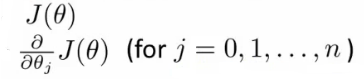
    
* Given code that can do these two things, gradient descent repeatedly does the following update:

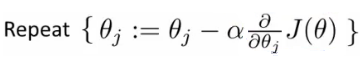

Here is where things get interesting. Instead of using gradient descent to minimize the cost function, we can use other *optimized methods*, such as:
* Conjugate Gradient
* **BFGS** (Broyden-Fletcher-Goldfarb-Shanno)
* **L-BFGS** (Limited memory - BFGS)
These are very optimized algorithms which take that same input and minimize the cost function. Keep in mind these are very complicated algorithms. 

Here are some properties:
* **Advantages**
    * No need to manually pick alpha
        * Have a clever inner loop (line search algorithm) which tries a bunch of alpha values and picks a good one
    * Often faster than gradient descent
        * Do more than just pick a good learning rate
    * Can be used successfully without understanding their complexity
* **Disadvantages**
    * Could make debugging more difficult
    * Should not be implemented themselves
    * Different libraries may use different implementations - may hit performance

# Multiclass Classification <a class="anchor" id="multiclass-classification"></a>
So far we have just looked at binary classification, but this can also be extended to additional classes! 

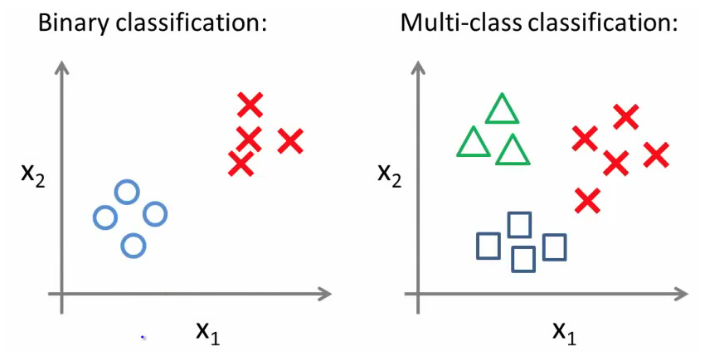

Given a data set with three class, how do we get a learning algorithm to work? We can use one vs. all classification to make binary classification work for multiclass classification!

### One vs. all classification
In order to perform one vs. all classification, we begin by splitting the training set into three separate binary classificaton problems.
* In other words we want to create a new fake training set:
    * Triangle (1) vs crosses and squares (0), $h_\theta^1(x)$
        * $P(y=1 | x_1;\theta)$
    * Crosses (1) vs triangles and squares(0),  $h_\theta^2(x)$
        * $P(y=1 | x_2;\theta)$
    * Square (1) vs crosses and triangles (0),  $h_\theta^3(x)$
        * $P(y=1 | x_3;\theta)$
        
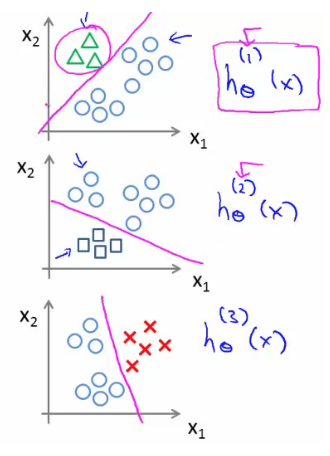

Overall, we want to make sure that:
* We train a logistic classifier $h_\theta^i(x)$ for each class i to predict the probability that y = 1. 
* On a new input $x$, to make a prediction, pick the class $i$ that maximizes the probability that $h_\theta^i(x)$ = 1

# Regularization <a class="anchor" id="regularization"></a>
At this point we have seen a few algorithms concerning linear and logistic regression, of which work well for many applications. But, these can suffer from **overfitting**. We have touched on the concepts of overfitting and underfitting and how they relate to machine learning algorithms before. 

Lets do a quick review and see how the concept of **regularization** can help. We will be working with the data set shown in the images below:

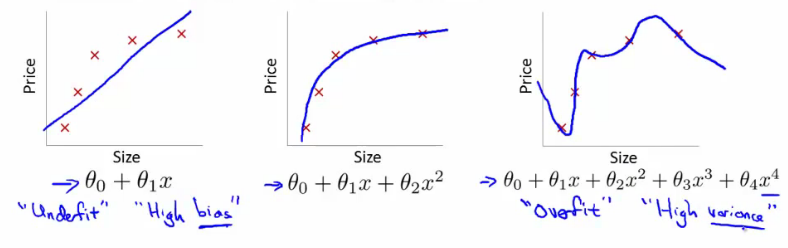

Using our house pricing example again, we can see several different fits based on different models. 

On the left, we try to fit a linear model to the data. We can see that it is not a great fit due to being to simple. It isn't able to explain the **variance** that our response (y = price) shows. This is known as **underfitting**, or **high bias**. Bias is a historic/technical term- the idea comes from the thought that: if we are fitting a straight line the data, we have a strong preconception that there should be a linear fit-in other words, we are biased that it may be linear. Aka, we are making more assumptions about the form of the target function. 

Now in the middle plot, we fit a quadratic function and can see that it works well! 

However, in the right plot, we fit a 4th order polynomial. The curve fit's through all 5 examples and seems to do a good job of fitting the *training set*. In fact, the total error on the training set would be 0 (each prediction perfectly matches the real world observation). 

The problem though with this model, is that it has **overfit** our data set, in other words it has **high variance**! Basically, what is happening is that the model is finding patterns in the data that don't actually exist, and then when new data is applied poor predictions are made. 

In a bit more detail, variance is error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

## Background: Bias and Variance
In supervised machine learning an algorithm learns a model from training data.

The goal of any supervised machine learning algorithm is to best estimate the mapping function (f) for the output variable (Y) given the input data (X). The mapping function is often called the target function because it is the function that a given supervised machine learning algorithm aims to approximate.

The prediction error for any machine learning algorithm can be broken down into three parts:
* Bias Error
* Variance Error
* Irreducible Error

The irreducible error cannot be reduced regardless of what algorithm is used. It is the error introduced from the chosen framing of the problem and may be caused by factors like unknown variables that influence the mapping of the input variables to the output variable.

### Bias Error
Bias are the simplifying assumptions made by a model to make the target function easier to learn.

Generally, parametric algorithms have a high bias making them fast to learn and easier to understand but generally less flexible. In turn, they have lower predictive performance on complex problems that fail to meet the simplifying assumptions of the algorithms bias.

* **Low Bias**: Suggests less assumptions about the form of the target function.
* **High-Bias**: Suggests more assumptions about the form of the target function.

Examples of low-bias machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

Examples of high-bias machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

### Variance Error
Variance is the amount that the estimate of the target function will change if different training data was used.

The target function is estimated from the training data by a machine learning algorithm, so we should expect the algorithm to have some variance. Ideally, it should not change too much from one training dataset to the next, meaning that the algorithm is good at picking out the hidden underlying mapping between the inputs and the output variables.

Machine learning algorithms that have a high variance are strongly influenced by the specifics of the training data. This means that the specifics of the training data influence the number and types of parameters used to characterize the mapping function.

* **Low Variance**: Suggests small changes to the estimate of the target function with changes to the training dataset.
* **High Variance**: Suggests large changes to the estimate of the target function with changes to the training dataset.
Generally, nonparametric machine learning algorithms that have a lot of flexibility have a high variance. For example, decision trees have a high variance, that is even higher if the trees are not pruned before use.

Examples of low-variance machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

Examples of high-variance machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

## Back to regularization
So, with that background understood, lets do a quick recap:
* If we have too many features, then the learned hypothesis may give a cost function of exactly 0
* But this tries to hard to fit the training set! It may pick up patterns that don't actually exist in the real world function
* In turn it fails to provide a **general** solution! In other words, it can't generalize and work well on new training examples (which is the whole goal of machine learning)

## Overfitting with Logistic Regression
This same thing can happen in logistic regression. 

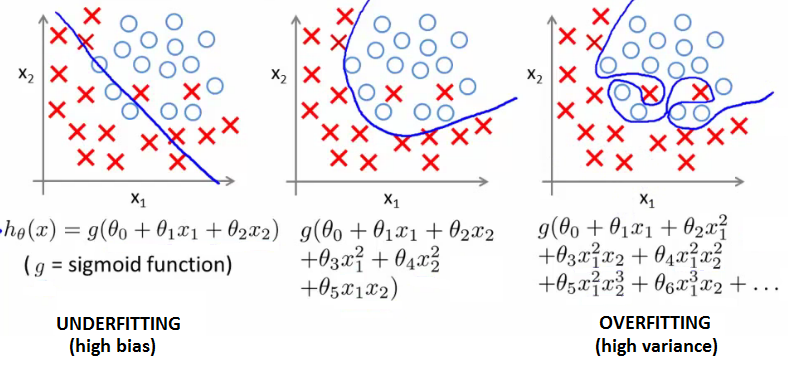

## Addressing overfitting 
So how do we deal with this concept of overfitting?
1. We can **reduce the number of features**
    * manually select which features to keep
    * can also use model selection algorithms (discussed later)
    * However, as we reduce the number of features, we lose some information. 
    * Ideally, we would select those which minimize data loss, but even so, we lose some information
2. **Regularization**
    * Here we keep all features, but we reduce the magnitude of the parameters $\theta$
    * Works well when we have a lot of features, each of which contributes a bit to the predicting y
    
# Cost function optimization for Regularization <a class="anchor" id="cost-function-regularization"></a>
So, in the case of regularization we are trying to penalize certain $\theta$ parameters and make them small to prevent over fitting. Take a look below:

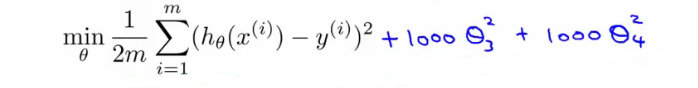

We can see that our cost function has an addition (the blue terms), that contain $\theta_3$ and $\theta_4$. Now, when we run gradient descent and say our parameter values for $\theta_3$ and $\theta_4$ are high, our cost will also be high! This means that we end up finding a model with $\theta_3$ and $\theta_4$ close to zero, and it is basically a quadratic function.

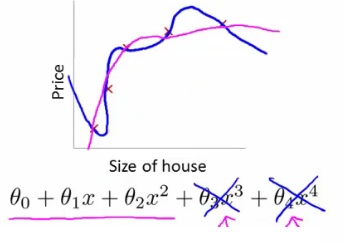

So, we can see that in this example we penalize two of the parameter values.

But more generally, regularization is as follows:
* small values for parameters corresponds to a simpler hypothesis 
* in other words you effectively get rid of some terms
* A simpler hypothesis is less prone to overfitting

## General example
* lets say we have 100 features ($x_1,x_2,...,x_{100}$)
* now, unlike in the polynomial example, we don't know which are the higher order terms
* So how do we pick which ones to shrink?
* With regularization we will take the cost function and modify it to shrink every parameter!
* How do we do this?
    * add a term at the end- a regularization term!
    * This term shrinks every parameter
    * By convention we don't penalize the bias term $\theta_0$
    * minimization is just from $\theta_1$ onwards
    
The final equation can be seen here:

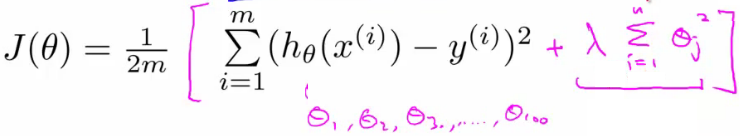

Some notes on the equation above: 
* $\lambda$ is the **regularization parameter**
    * this parameter controls a trade off between our two goals
    * 1) we want to fit the training set well
    * 2) Want to keep the parameters small (prevent overfitting)
* With our example, using the **regularized objective** (ie the cost function with the regularization term), you get a much smoother curve which fits the data and gives a much better hypothesis
* if $\lambda$ is very large, we end up penalizing ALL of the parameters, so all parameters end up being close to zero
    * when that happens its like we are getting rid of all of the terms of the hypothesis
    * This results in underfitting!
    * think about like we are making the model way to simple again
    * In other words, this hypothesis is too biased because of the absence of any parameters
* if $\lambda$ is too big, we run into the previous issue of overfitting 
    

# Regularization for Linear Regression <a class="anchor" id="linear-regression-reg"></a>
So far we have looked at gradient descent for linear regression. Our linear regression equation once we have added regularization is shown here: 

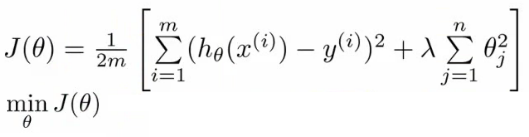

Previosuly, in order to minimize the cost function $J(\theta)$, gradient descent would repeatedly update the parameters simultaneously, shown here: 

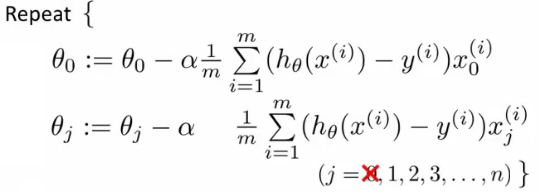

We now want to make sure that we **regularize** these two rules! In order to follow the method of gradient descent, our update rules must include the partial derivative of the **regularized $J(\theta)$**. This can be shown below: 

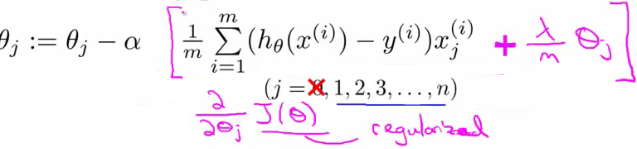

It shold be noted that if group the $\theta_j$ terms together, like so:

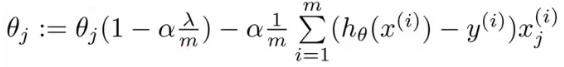

Then the term: 
### $$1 - \alpha*\frac{\lambda}{m}$$
Is going to be a number less than 1 usually. This is because generally the learning rate is small and m is large. So it generally evaluates to around 0.95 to 0.99. In other words, $\theta_j$ is multiplied by 0.99, and the second term is nearly identical to that of original gradient descent.

# Regularization for Logistic Regression <a class="anchor" id="logistic-regression-reg"></a>
Okay so no after digging into regularization we finally return to logistic regression. We saw earlier than logistic regression can be prone to overfitting when it has many features. Lets take a look at how to regularize it and prevent that high variance scenario! First recall the logistic regression cost function:

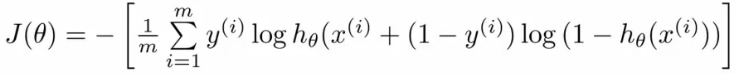

To modify it, we simply need to add an extra term:

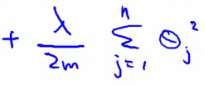

This will have the effect of penalizing the parameters $\theta_1, theta_2,...,\theta_n$. This means that just like with linear regression we will be able to find what appears to be a better fitting lower order hypothesis. 

But how do we implement this using gradient descent? Well the original logistic regression with gradient descent function was as follows:

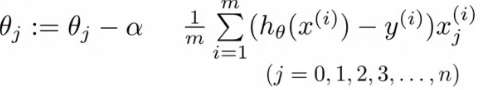

So here, again, we just need to modify the algorithm to update the rule for $\theta_1$ and onwards. It will again look cosmetically the same as linear regression-but what is different?? It has a very different hypothesis!!!

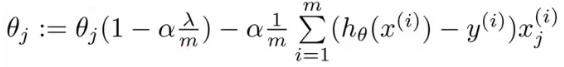

# Problem set - Logistic Regression under the hood <a class="anchor" id="problem-set-1"></a>
* The following walk through is based on programming exercise 2 from Andrew NG's Machine Learning course
* It will be diving under the hood of logistic regression, seeing it working on real data

---


# 1. Logistic Regression 
In the first part of this exercise we will build a **logistic regression model** to predict whether a student gets admitted into a university. 

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision. To accomplish this, we're going to:

### Build a classification model that estimates the probability of admission based on the exam scores.

The first step we are going to take is to simply import our data - it can be found in ex2data1.txt (inside of the data folder). 

## 1.1 Exploring the Data
Exploring and visualizing the data should always be your first step in order to gain familiarity with the problem at hand.

In [3]:
# start with our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# and now lets actually grab our dataset using pandas, setting the correct column names
admissionData = pd.read_csv('data/ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [5]:
# and lets also do a bit of data inspection with the head() function
admissionData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
# and the describe method
admissionData.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


What can we conclude about our problem at this point?
* we are working with a training set that consists of 100 examples (m)
* Each example has two input features (Exam1 and Exam 2) and one output feature (admitted)
* It looks as though 60% of students were admitted. 

Lets try and get a visualization of the data!

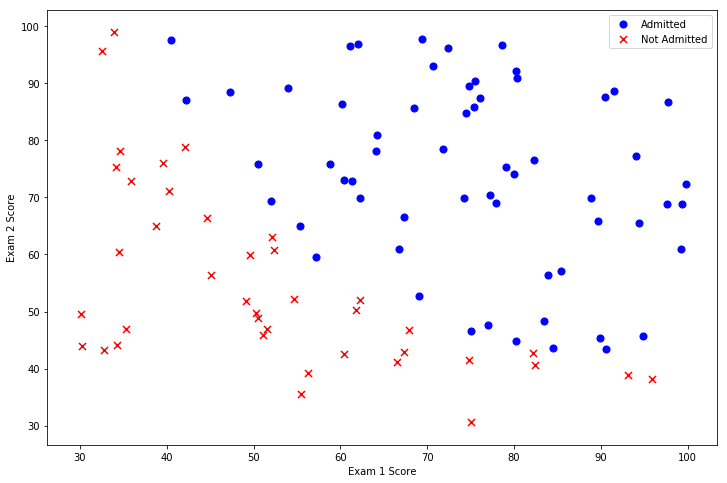

In [7]:
# grabbing all of the examples where the student was admitted
admitted = admissionData[admissionData['Admitted'].isin([1])]

# grabbing all of the examples where the student was not admitted
notAdmitted = admissionData[admissionData['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(admitted['Exam 1'], admitted['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(notAdmitted['Exam 1'], notAdmitted['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')

ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

It is relatively easy to see from this plot that there is a clear **decision boundary** between the two classes. At this point we need to implement logistic regression so we can train a model to predict the outcome (based on two exam scores for a particular student, will that student be admitted?)

## 1.2  Implementation 
---
## 1.2.1 Sigmoid function
So before we start with the actual cost function, take a minute to recall what the logistic regression hypothesis looks like:
### $$h_\theta(x) = g((\theta^Tx))$$

Where we define $g(z)$ as:
### $$g(z) = \frac{1}{1+e^{-z}}$$

And the entire hypothesis can be represented as: 
### $$h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$$

In this case, g is the **sigmoid function**. It is important to remember why we want to use the sigmoid function. Well, it is what allows to map any real number to 0-1, which is great for classification. It is also important to remember, for logistic regression, our hypothesis will *always* output a value between 0 and 1.

Lets write a function to calculate the sigmoid.

In [8]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

Lets go through a quick sanity check so we can make sure that the function is working. 

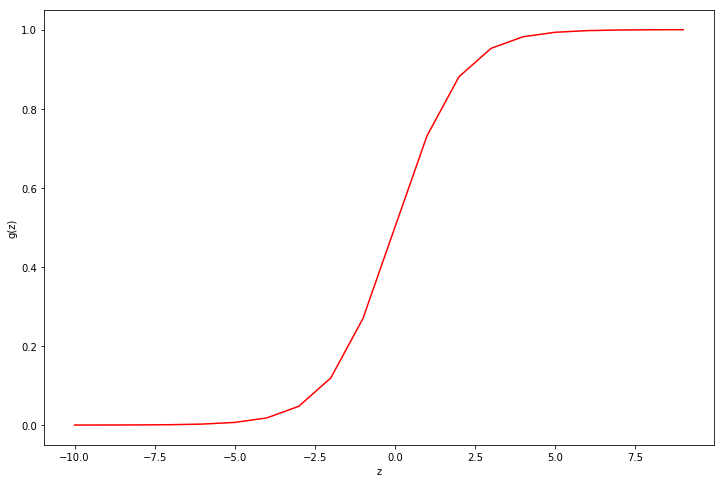

In [9]:
sanity_check_nums = np.arange(-10,10,step = 1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(sanity_check_nums, sigmoid(sanity_check_nums), 'r')
ax.set_xlabel('z')
ax.set_ylabel('g(z)')

Excellent! This plot is just what we were expecting! When z is 0 we see that the sigmoid function returns exactly 0.5. This can be used to threshold our predictions: ie when z is greater than 0, g(z) is greater than 0.5, and we predict 1 (the positive case). 

Keep in mind the following:
### $$z = \theta^Tx$$
Which was our hypothesis for linear regression!

## 1.2.2 Cost Function and Gradient
Okay now that we have our sigmoid function, which will be used to compute our hypothesis (model) predictions, we need a way to test how well are predictions match against the training data responses. 

Remember, the cost is used to figure out how our model is performing. The model that ends up producing the lowest cost, **and generalizing** well, is most likely the model we want. 

Recall, the cost function for logisitic regression is:
### $$J(\theta) = -\frac{1}{m}\big[\sum_{i=1}^m\big(y^ilog(h_\theta(x^i)) + (1 - y^i)log(1-h_\theta(x^i))\big)\big]$$
Lets define this function in code.

In [10]:
def cost(theta, X, y):
    
    # grabbing our vectors and setting them to numpy matrices (we switch from np arrays to np matrices due 
    # to the ease of matrix multiplication and the np matrix)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    # left term from equation above, using np.multiply function to perform vector multiplication
    firstTerm = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    
    # right term from equation above
    secondTerm = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    
    # add first and second term (each being a vector), and dividing by m
    return np.sum(firstTerm - secondTerm) / (len(X))

And as we did for linear regression, we need to get our data into the right from so that our cost function can handle it correctly.

In [11]:
# add a ones column - for the bias term, needed for the matrix multiplication to work out correctly
admissionData.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = admissionData.shape[1]
X = admissionData.iloc[:,0:cols-1]
y = admissionData.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

Lets quickly check the shape of our inputs to make sure that everything looks good.

In [12]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

And finally lets compute the cost for our initial set of model parameters (all values of theta are set equal to zero)!

In [13]:
cost(theta, X, y)

0.69314718055994529

Lets really take a second to internalize what this means! What we just found was the cost function (based on the logistic regression cost function) that our model was penalized when it used $\theta_0 = \theta_1 = \theta_2 = 0$ as its parameters. 

Our goal is to find values for $\theta$ that minimize this cost, so we ideally want the cost to decrease from this value of 0.6931...! 

Remember, in linear regression our cost function was based around minimizing the residual errors between the real world observation and the predictions our model made. Here, in logistic regression, our cost is based on the maximum likelihood method. This method may still seem a little fuzzy, but don't worry, we will be digging further into it in the Logistic Regression from a Statistical Perspective walk through. 

Okay, so with that said, our next step is to create a function that will compute the gradient- It will take in our training data, labels, and some parameters theta. Remember its form is:

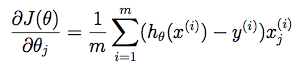

Note that this is **not** going to perform gradient descent. It only calculates the gradient! To perform gradient descent we would take the gradient, and utilize it in the gradient descent algorithm to update the parameters here:

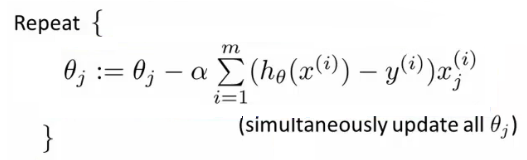

Gradient descent is used to find the parameters $\theta$ that minimize the cost, but we will see shortly there is another way to do that.

In [14]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    # grabbing the number of parameters, in this case 3
    parameters = int(theta.ravel().shape[1])
    
    # creating variable (1 x 3) to hold our gradient update values-this is needed to perform 
    grad = np.zeros(parameters)
    
    # calculating the difference between out prediction and the real world output
    error = sigmoid(X * theta.T) - y
    
    # for loop going through each parameter (3 total in this case)
    for i in range(parameters):
        
        # temp value to hold update (remember, all updates must be simultaneous). We are multiplying the error,
        # h(x) - y times the corresponding X feature vector. ie for the update to theta_1 we multiply by x_1
        temp = np.multiply(error, X[:,i])
        
        # setting our gradient output, this contains the new values for our parameters
        grad[i] = np.sum(temp) / len(X)
        
    return grad

Note that in the method above we do **not** actually perform gradient descent - this is just used to compute a single gradient descent step, and subsequently return the updated parameters.

Lets look at a single call to the gradient function. The outputted values below are a single gradient for each theta value.

In [15]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

If we take the above vector containing the gradient for each theta value, and multiply it times $\alpha$ the learning rate, and then subtract from the previous value of theta, we would be performing one iteration of gradient descent. But lets look at another way to learn the parameters...

## 1.2.3 Learning Parameters with prebuilt function
Now for the linear regression gradient descent assignment we completed, we found the optimal parameters of a linear regression model by implementing gradient descent. We wrote a cost function, and then a gradient descent function, which went through 1000 iterations of calculating the cost, calculating the gradient, updating our parameters, and then repeating. at the end of it all, our parameters should have converged to a global minimum. 

This, time instead of taking gradient descent steps, we will use a built in function that allows us to do this instead. In octave, this function is **fminunc**. However, since we are using python, we can use pythons **optimize namespace to do the same thing**. 

This function is an optimization solver that finds the minimum of an unconstrained function (parameters can take any real value). In our case of logistic regression, we want to optimize the cost function $J(\theta)$ with parameters $\theta$. 

Concretely, we are going to pass **fmin_tnc**:
* the initial values of theta
* a function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for dataset (X,y)

Besides being optimized and very fact, using this function also allows us to only have to deal with providing:
* function to calculate cost
* function to calculate gradient

Lets see how this would look in code. We will use SciPy's truncated newton (TNC) implementation to find the optimal parameters!

In [16]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X,y))
result

(array([-25.16131861,   0.20623159,   0.20147149]), 36, 0)

Okay, great! We have an set of parameters for $\theta$, lets see what the cost is when utilizing them.

In [17]:
cost(result[0], X, y)

0.20349770158947461

Great! We can see that our cost most definitely did decrease from where we started (from .69... to .203). And lets see the decision boundary created by our parameters!

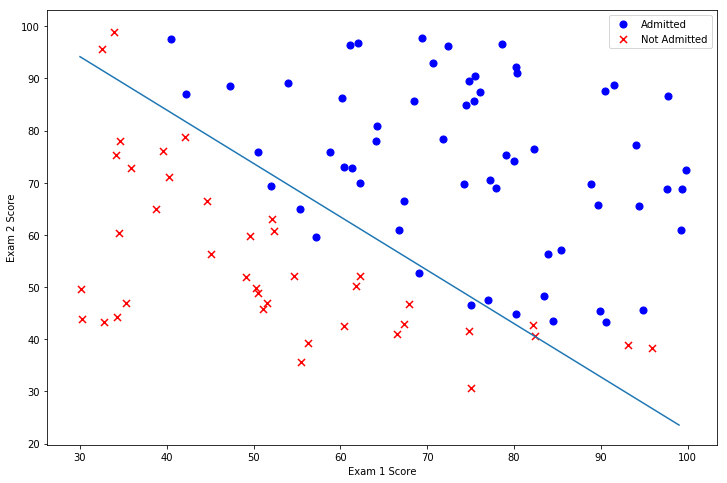

In [18]:
# grabbing all of the examples where the student was admitted
admitted = admissionData[admissionData['Admitted'].isin([1])]

# grabbing all of the examples where the student was not admitted
notAdmitted = admissionData[admissionData['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(admitted['Exam 1'], admitted['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(notAdmitted['Exam 1'], notAdmitted['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')

ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# adding in our decision boundary, based on h(x) and solving for exam_2
theta_0, theta_1, theta_2 = result[0]
exam_1 = np.arange(30, 100, 1)
exam_2 = (-theta_0 - theta_1*exam_1)/(theta_2)
ax.plot(exam_1, exam_2)

## 1.2.4 Evaluating Logistic Regression 
Awesome! So we now can see that the model learned a pretty rad decision boundary for our data set. We can visually see that its a pretty good fit, but lets look at how the model makes predictions on new examples, and specifically how to evaluate those predictions!

For example, now that we have learned the parameters, we can use of model h(x) to predict whether a specific student will be admitted or not. For a student with an exam 1 score of 45 and an exam 2 score of 85, we should expect to see an admission probability of 0.776.

In [19]:
# lets check our prediction

x = np.matrix([1,45,85])
theta = np.matrix([-25.16131861,   0.20623159,   0.20147149])
prediction = sigmoid(x*theta.T)
prediction[0,0]

0.77629069439635223

Awesome, we can see that a single prediction works as expected! Lets now try to write a function that will output predictions for a dataset X using our learned parameters theta. We can then use this function to score the training accuracy of our classifier.

In [20]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [21]:
# determining our accuracy
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)

# using zip here to pull in our predictio and the real world observation 
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]

# mapping out correct output to integrers since it is a vector of 0s and 1s representing examples we got correct
# and which we did not
# then we add all of the 1s, giving us 89- the number we predicted correctly
# and finally we divide by the total number of examples, 100, to get our accuracy %
accuracy = (sum(map(int, correct)) / len(correct))
print ('accuracy =', accuracy, '%')

accuracy = 0.89 %


# 2 Regularized Logistic Regression 
Now that we have wrapped up the first round of the exercise, its time for part 2. We are going to improve our logistic regression algorithm by adding a regularization term. Remember, this term is going to penalize the parameter values, ideally making the model a bit simpler and helping it generalize more effectively to new training examples. 

So, suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

## 2.1 Data visualization
As always, lets start off by pulling in our data set, familiarizing ourselve's through a bit of exploration.

In [22]:
microchipData = pd.read_csv('data/ex2data2.txt', header=None, names=['Test 1', 'Test 2', 'Accepted'] )

In [23]:
microchipData.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [24]:
microchipData.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


Okay so we have a training set that is comprised of 118 examples, and ~ 49% were accepted. 

Lets get a visualization of this training set. 

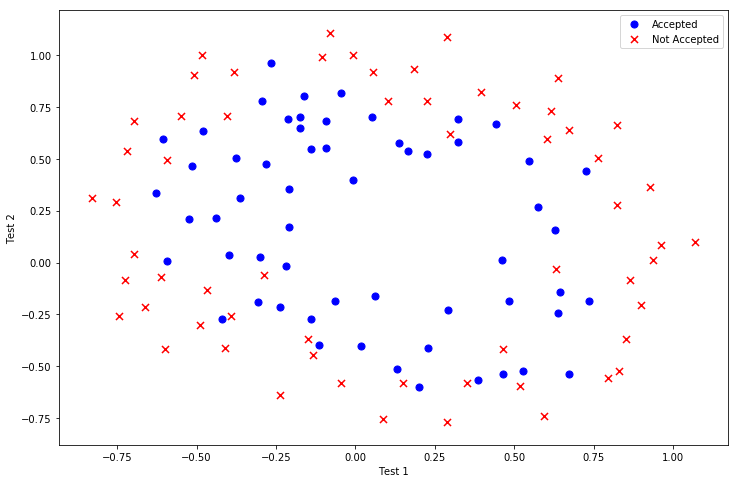

In [25]:
# in the first example we used the isin() function, just using a logical operator here
accepted = microchipData[microchipData['Accepted'] == 1]
notAccepted = microchipData[microchipData['Accepted'] == 0]

# sets up the axes and create a blank figure
fig, ax = plt.subplots(figsize=(12,8))

# this is where the data is actually plotted to the figure
ax.scatter(accepted['Test 1'], accepted['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(notAccepted['Test 1'], notAccepted['Test 2'], s=50, c='r', marker='x', label='Not Accepted')

# adding our legend and labels
ax.legend()
ax.set_xlabel('Test 1')
ax.set_ylabel('Test 2')

Awesome, so we can clearly see here that a decision boundary exists, however it looks a bit more complicated than the last one- in other words it is not linear. One way to deal with this using a linear technique like logistic regression is to construct features that are derived from polynomials of the original features. Let's start by creating a bunch of polynomial features.

## 2.2 Feature Mapping
One way to fit the data better is to create more features from each data point. We are going to mape the features into all polynomial terms of $x_1$ and $x_2$ up to the 6th power (as in no feature, being $x_1^i*x_2^j$ can have an $i+j$ greater than 6! 

In other words we want to create:

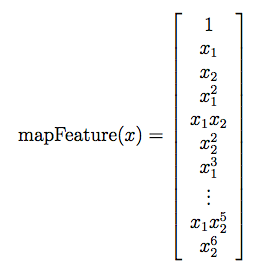

This will end up being a 28 dimensional vector. A logistic regression trained on this higher dimension feature vector will have a more complex decision boundary and will appear non-linear when drawn on our 2-dimensional data plot. 

In [26]:
# setting our degree of polynomial
degree = 6

# grabbing out x1 and x2 features
x1 = microchipData['Test 1']
x2 = microchipData['Test 2']

# creating a new data frame for the mapped features, and giving it a ones column for the bias term
mappedData = pd.DataFrame()
mappedData['Ones'] = np.ones(118)

# mapping each feature, making sure to include all polynomial terms where i + j is less than our equal to 6 
# our degree
for i in range(1, degree+1):
    for j in range(0, i+1):
        mappedData['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

In [27]:
mappedData.head()

,Ones,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [28]:
mappedData.shape

(118, 28)

Awesome, we can see here that our feature mapping working perfectly, and that we now have 28 features to work with instead of just 2! (x1 and x2). Remember though, these are still considering linear features! As in, in addition to x1 and x2, we now have x3, x4,... and so on. 

While feature mapping does allow us to build a more expressive classifier, it is also more susceptible to **overfitting**. Lets look at how to combat this by implementing regularization!

## 2.3 Cost Function and Gradient (Regularized)
Now it is time to complete code that will compute the regularized cost and gradient! Remember, the cost function for regularized logistic regression looked like: 

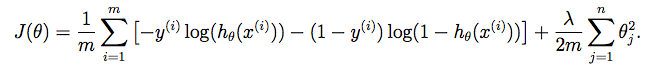

and the gradient of the cost function for j > 0 (j =0 has no regularization term) in this case looks like:

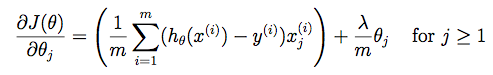

In [29]:
def costReg(theta, X, y, regParameter):
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y).T
    
    firstTerm = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    
    secondTerm = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T))) 
    
    regTerm = (regParameter / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]],2))

    return np.sum(firstTerm - secondTerm) /(len(X)) + regTerm

Keep note that we now have a regularization term in this equation! Ask yourself, what is the regularization doing? Well, when a certain set of parameters $\theta$ are high, that increase the regularization term, and hence increases the cost. We want to minimize the cost, so this penalizes parameter outputs thats have large values, and hence tends to make the model simpler. 

We also have a regularization parameter. This is a hyperparameter that controls the effectiveness of the regularization term. If it is 0, there is no regularization, and if it is large, there is a ton of regularization.

Now lets add regularization to our gradient.

In [30]:
def gradientReg(theta, X, y, regParameter):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y).T
    
    parameters = theta.shape[1]
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    # looping through all parameters and associated features 
    for i in range(parameters):
        innerTerm = np.multiply(error, X[:,i]) 
        
        if (i == 0):
            grad[i] = np.sum(innerTerm) / len(X)
        else: 
            grad[i] = np.sum(innerTerm) / len(X) + (regParameter / len(X))*theta[:,i]
    
    return grad
        

Now lets initialize our variables as we did in part 1. Remember they need to be initialzed so that we can input them are parameters to our cost and gradient functions.

In [31]:
# setting X and y 
cols = mappedData.shape[1]
mappedX = mappedData.iloc[:,0:cols]
y = microchipData['Accepted']

# converting to numpy arrays and initializing parameter array theta
mappedX = np.array(mappedX.values)
y = np.array(y.values)
theta2 = np.zeros(28)

Let's initialize our learning rate to a sensible value. We can play with this later if necessary (i.e. if the penalization is too strong or not strong enough).

In [32]:
regParameter = 0

Now let's try calling our new regularized functions with the default (0) values for theta to make sure the calculations are working.

In [33]:
costReg(theta2, mappedX, y, regParameter)

0.6931471805599454

In [34]:
gradientReg(theta2, mappedX, y, regParameter)

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02])

Now we can use the same optimization function from part 1 to compute the optimal solution.

In [35]:
parameters2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(mappedX, y, regParameter))
parameters2

(array([  11.73375479,   13.00307565,    4.86257641, -116.65377546,
         -55.12322846,  -48.1700578 , -101.98638566,  -65.25364071,
         -29.57614871,    7.135086  ,  407.43228408,  331.30694415,
         434.88209119,  156.8986809 ,   63.10197593,  184.22677533,
         227.58600109,  243.48381853,   89.48208738,   26.39889436,
          -6.87159556, -468.26387348, -559.20250149, -795.05897412,
        -488.88238112, -500.92660861, -184.34884827,  -40.03041732]), 280, 3)

Finally, we can use the prediction function from part 1 to see how accurate our solution is on the training data.

In [36]:
# determining our accuracy
# setting our theta_min to that which was calculating in the optimization function above
theta_min = np.matrix(parameters2[0])

# calling our prediction function we defined above
predictions = predict(theta_min, mappedX)

# comparing all aligned values in predictions and y (real world observations)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]

accuracy = (sum(map(int, correct)) / len(correct))
print ('accuracy =', accuracy, '%')

accuracy = 0.8728813559322034 %


Take a second to message around with the value of $\lambda$, our regularization parameter, to see how it can effect the accuracy. As we increase the value, our accuracy decreases, as our model becomes simpler. However, the idea is that this prevents overfitting and will allow the model the generalize more effectively to new training examples!

## 2.4 Plotting the Decision Boundary
Lets take a moment now to plot several different decision boundary's based on models that used different amounts of regularization. 

Notice the changes in the decision boundary as we vary $\lambda$! With a small value for $\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data. However, with a large value for $\lambda$, you will not get a good fit as the model will become to simple, thus underfitting the data.

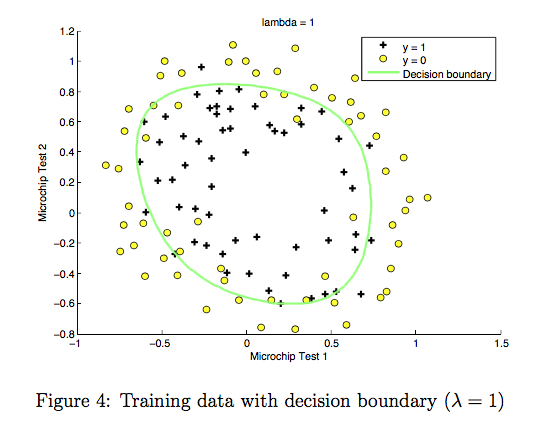

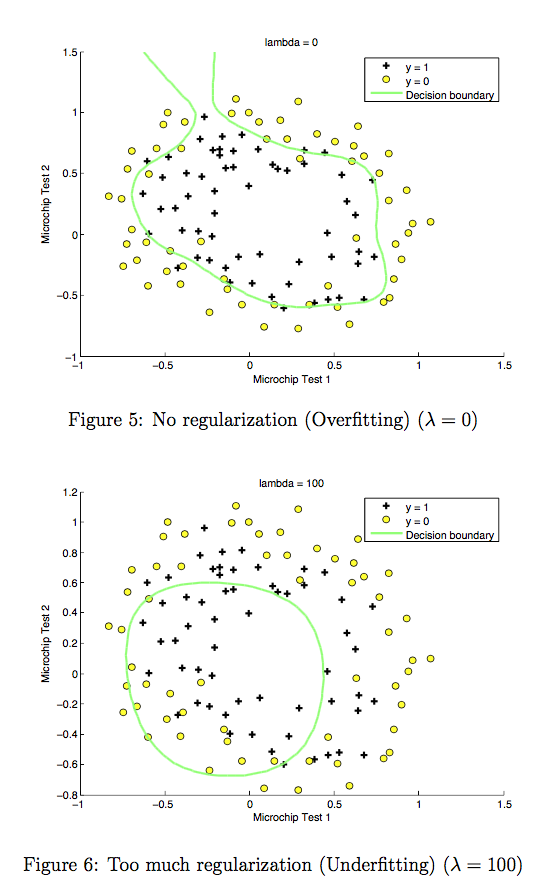

# Logistic Regression With Scikit Learn <a class="anchor" id="scikit-learn"></a>